In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
#Read in dataset, include NA values (unwanted characters) 
spotify_data = pd.read_csv("Final_database.csv", na_values=['n', 'n ', 'n-a','#', 'n', ' '], low_memory = False)
spotify_data.head()


,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic


In [4]:
#Identify unwanted characters in specific columns 
for x in spotify_data["tempo"]:
    if isinstance(x,str) is True:
        try:
            x = float(x)
        except:
            print(x)

In [5]:
#Delete rows with NA values, convert object columns from object to float
spotify_clean = spotify_data[["Country", "Uri", "Popularity", "Title", "Artist", "Album/Single", "Genre", "Artist_followers", "Explicit", "Album", "Release_date", "Track_number", "Tracks_in_album", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acoustics", "instrumentalness", "valence" ,"tempo", "duration_ms", "time_signature", "Genre_new", "Days_since_release", "Released_after_2017"]]
spotify_clean.dropna()
spotify_clean.info(verbose = True, memory_usage = True, show_counts = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Country              170633 non-null  object 
 1   Uri                  170628 non-null  object 
 2   Popularity           170633 non-null  float64
 3   Title                170627 non-null  object 
 4   Artist               170628 non-null  object 
 5   Album/Single         170628 non-null  object 
 6   Genre                166681 non-null  object 
 7   Artist_followers     170587 non-null  float64
 8   Explicit             170628 non-null  object 
 9   Album                170628 non-null  object 
 10  Release_date         170628 non-null  object 
 11  Track_number         170628 non-null  float64
 12  Tracks_in_album      170628 non-null  float64
 13  danceability         170614 non-null  float64
 14  energy               170614 non-null  float64
 15  key              

In [6]:
#Remove additional rows with blank (null) values
for x in spotify_clean.columns:
    spotify_cleaner = spotify_clean[spotify_clean[x].notna()]
spotify_cleaner.info(verbose=True, memory_usage=True,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167411 entries, 0 to 170632
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Country              167411 non-null  object 
 1   Uri                  167411 non-null  object 
 2   Popularity           167411 non-null  float64
 3   Title                167410 non-null  object 
 4   Artist               167411 non-null  object 
 5   Album/Single         167411 non-null  object 
 6   Genre                163571 non-null  object 
 7   Artist_followers     167370 non-null  float64
 8   Explicit             167411 non-null  object 
 9   Album                167411 non-null  object 
 10  Release_date         167411 non-null  object 
 11  Track_number         167411 non-null  float64
 12  Tracks_in_album      167411 non-null  float64
 13  danceability         167397 non-null  float64
 14  energy               167397 non-null  float64
 15  key              

In [7]:
#Export CSV 
spotify_cleaner.to_csv("spotify_cleaner.csv")

In [8]:
# Everything from here on is Conrad's!

spotify_global = spotify_cleaner[spotify_cleaner["Country"]=="Global"]
spotify_global["Years Since Release"]=spotify_global["Days_since_release"]/365
spotify_global.head()

/var/folders/kb/s2yk09p10vl4l8pgl__kwgb40000gn/T/ipykernel_54733/705444505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_global["Years Since Release"]=spotify_global["Days_since_release"]/365


,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,acoustics,instrumentalness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Years Since Release
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0.323000,0.000000,0.720,171.993,258639.0,4.0,hip hop,740.0,1.0,2.027397
16,Global,https://open.spotify.com/track/5xhJmd0I15jFcEd...,418.00,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,...,0.064700,0.000169,0.120,170.138,217613.0,4.0,pop,1314.0,1.0,3.600000
39,Global,https://open.spotify.com/track/0wJJhRgdHhT93Z3...,56.00,hymn,Kesha,single,dance pop,5910376.0,True,Hymn,...,0.147000,0.000000,0.380,67.037,205600.0,4.0,pop,1199.0,1.0,3.284932
58,Global,https://open.spotify.com/track/6JSryEdVJTZq6YB...,78.40,arrows,Foo Fighters,album,alternative metal,8092392.0,False,Concrete and Gold,...,0.000209,0.000476,0.409,121.988,266187.0,4.0,metal,1156.0,1.0,3.167123
80,Global,https://open.spotify.com/track/7nAfXgeHfDO50up...,244.95,talking to myself,Linkin Park,album,alternative metal,17132813.0,False,One More Light,...,0.001840,0.000000,0.473,124.013,231307.0,4.0,metal,1272.0,1.0,3.484932


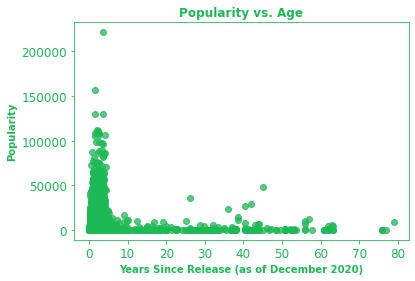

In [22]:
plt.scatter(spotify_global["Years Since Release"], spotify_global["Popularity"], marker="o", facecolors="#1DB954", edgecolors="#1DB954",
            alpha=0.75)
plt.title("Popularity vs. Age", weight='bold', color="#1DB954")
plt.xlabel("Years Since Release (as of December 2020)", weight='bold', color="#1DB954")
plt.ylabel("Popularity", weight='bold', color="#1DB954")
plt.tick_params(axis='x', colors="#1DB954", labelsize=12)
plt.tick_params(axis='y', colors="#1DB954", labelsize=12)
plt.savefig('temp.png', transparent=True, dpi=500)

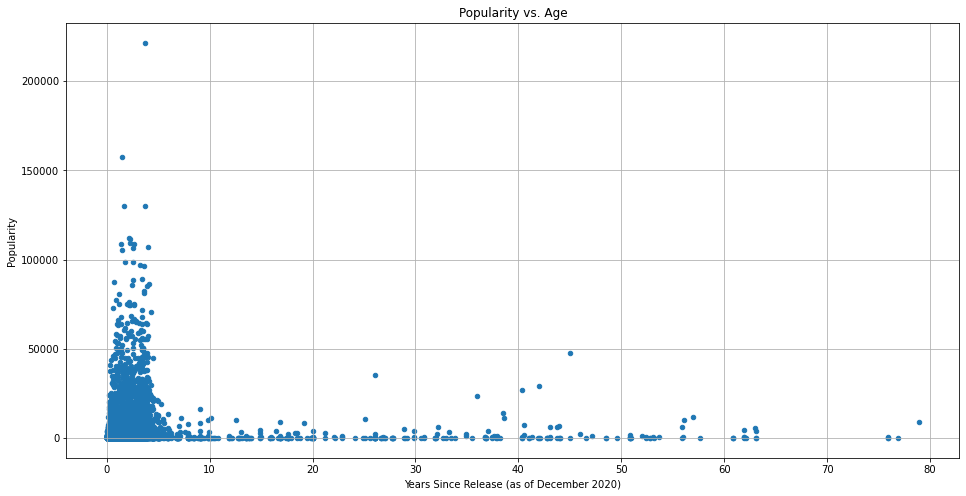

In [12]:
spotify_global.plot(kind="scatter", x="Years Since Release", y="Popularity", grid=True, figsize=(16,8),
              title="Popularity vs. Age")

plt.xlabel("Years Since Release (as of December 2020)")
plt.show()

In [17]:
# condense genres into broader categories

genres=spotify_global["Genre"].values.tolist()
cleanGenres=[""]*len(genres)
print(len(genres))
for x in range(len(genres)):
    genre = str(genres[x])
    if "reggae" in genre:
        cleanGenres[x]="Reggae"
    elif ("r&b" in genre) or ("soul" in genre) or ("funk" in genre) or ("afro" in genre) or ("blues" in genre):
        cleanGenres[x]="R&B"
    elif ("hip hop" in genre) or ("rap" in genre) or ("trap" in genre) or ("drill" in genre):
        cleanGenres[x]="Rap"
    elif ("pop" in genre) or ("dance" in genre) or ("edm" in genre) or ("disco" in genre) or ("house" in genre):
        cleanGenres[x]="Pop"
    elif ("rock" in genre) or ("metal" in genre):
        cleanGenres[x]="Rock"
    elif ("indie" in genre) or ("alternative" in genre):
        cleanGenres[x]="Indie"
    elif ("latin" in genre) or ("mariachi" in genre):
        cleanGenres[x]="Latin"
    elif ("country" in genre) or ("folk" in genre):
        cleanGenres[x]="Country"
    else:
        cleanGenres[x]="Other"

spotify_global["Clean_genre"] = cleanGenres
spotify_global.head()

5395


/var/folders/kb/s2yk09p10vl4l8pgl__kwgb40000gn/T/ipykernel_54733/2908863632.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_global["Clean_genre"] = cleanGenres


,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,instrumentalness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Years Since Release,Clean_genre
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0.000000,0.720,171.993,258639.0,4.0,hip hop,740.0,1.0,2.027397,Rap
16,Global,https://open.spotify.com/track/5xhJmd0I15jFcEd...,418.00,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,...,0.000169,0.120,170.138,217613.0,4.0,pop,1314.0,1.0,3.600000,Pop
39,Global,https://open.spotify.com/track/0wJJhRgdHhT93Z3...,56.00,hymn,Kesha,single,dance pop,5910376.0,True,Hymn,...,0.000000,0.380,67.037,205600.0,4.0,pop,1199.0,1.0,3.284932,Pop
58,Global,https://open.spotify.com/track/6JSryEdVJTZq6YB...,78.40,arrows,Foo Fighters,album,alternative metal,8092392.0,False,Concrete and Gold,...,0.000476,0.409,121.988,266187.0,4.0,metal,1156.0,1.0,3.167123,Rock
80,Global,https://open.spotify.com/track/7nAfXgeHfDO50up...,244.95,talking to myself,Linkin Park,album,alternative metal,17132813.0,False,One More Light,...,0.000000,0.473,124.013,231307.0,4.0,metal,1272.0,1.0,3.484932,Rock


Rap        2203
Pop        1808
Other       504
Latin       303
Rock        266
R&B         238
Country      28
Reggae       25
Indie        20
Name: Clean_genre, dtype: int64


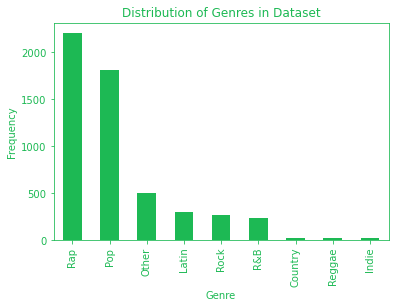

In [26]:
aggregate = pd.value_counts(spotify_global['Clean_genre'].values)
genreCountBar = aggregate.plot.bar(color="#1DB954")
genreCountBar.set_xlabel("Genre",color="#1DB954")
genreCountBar.set_ylabel("Frequency",color="#1DB954")
genreCountBar.set_title("Distribution of Genres in Dataset",color="#1DB954")
genreCountBar.xaxis.label.set_color('#1DB954')
genreCountBar.tick_params(axis='x', colors='#1DB954')
genreCountBar.tick_params(axis='y', colors='#1DB954')
sum = spotify_global["Clean_genre"].value_counts()
print(sum)

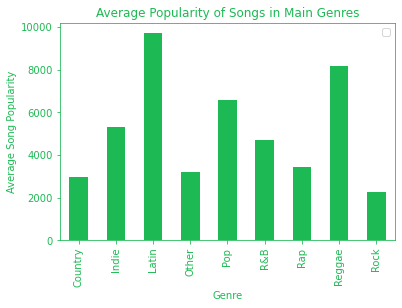

In [29]:
grouped_genre = spotify_global.groupby(["Clean_genre"]).mean()
genrePopularity = grouped_genre[["Popularity"]]
genrePopularityBar = genrePopularity.plot(kind="bar",color="#1DB954")
genrePopularityBar.set_xlabel("Genre",color="#1DB954")
genrePopularityBar.set_ylabel("Average Song Popularity",color="#1DB954")
plt.title("Average Popularity of Songs in Main Genres",color="#1DB954")
genrePopularityBar.tick_params(axis='x', colors='#1DB954')
genrePopularityBar.tick_params(axis='y', colors='#1DB954')
plt.legend("")

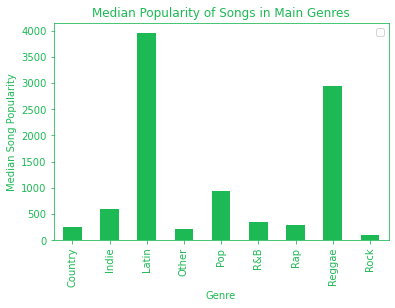

In [30]:
groupedMedGenre = spotify_global.groupby(["Clean_genre"]).median()
genreMedPopularity = groupedMedGenre[["Popularity"]]
genreMedPopularityBar = genreMedPopularity.plot(kind="bar",color="#1DB954")
genreMedPopularityBar.set_xlabel("Genre",color="#1DB954")
genreMedPopularityBar.set_ylabel("Median Song Popularity",color="#1DB954")
plt.title("Median Popularity of Songs in Main Genres",color="#1DB954")
genreMedPopularityBar.tick_params(axis='x', colors='#1DB954')
genreMedPopularityBar.tick_params(axis='y', colors='#1DB954')
plt.legend("")

Text(0.5, 1.0, 'Popularity of Songs by Genre')

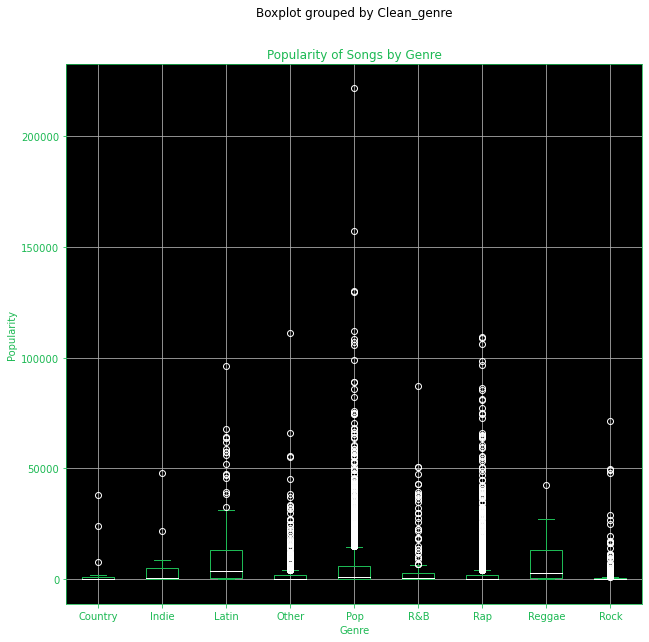

In [39]:
color_dict =  {'patch_artist': False,
             'boxprops': dict(color= "#1DB954"),
             'capprops': dict(color="#1DB954"),
             'flierprops': dict(color="white", markeredgecolor="white"),
             'medianprops': dict(color="white"),
             'whiskerprops': dict(color="#1DB954")}
popularityBox = spotify_global.boxplot("Popularity", by="Clean_genre", figsize=(10, 10),**color_dict)
plt.xlabel("Genre",color='#1DB954')
plt.ylabel("Popularity",color='#1DB954')
popularityBox.tick_params(axis='x', colors='#1DB954')
popularityBox.tick_params(axis='y', colors='#1DB954')
plt.title("Popularity of Songs by Genre",color='#1DB954')

In [120]:
#Anova test for previous box plot

group0 = spotify_global[spotify_global["Clean_genre"] == "Country"]["Popularity"]
group1 = spotify_global[spotify_global["Clean_genre"] == "Indie"]["Popularity"]
group2 = spotify_global[spotify_global["Clean_genre"] == "Latin"]["Popularity"]
group3 = spotify_global[spotify_global["Clean_genre"] == "Other"]["Popularity"]
group4 = spotify_global[spotify_global["Clean_genre"] == "Pop"]["Popularity"]
group5 = spotify_global[spotify_global["Clean_genre"] == "R&B"]["Popularity"]
group6 = spotify_global[spotify_global["Clean_genre"] == "Rap"]["Popularity"]
group7 = spotify_global[spotify_global["Clean_genre"] == "Reggae"]["Popularity"]
group8 = spotify_global[spotify_global["Clean_genre"] == "Rock"]["Popularity"]

stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8)

F_onewayResult(statistic=17.645632617083642, pvalue=3.1260834247865894e-26)